# Vgg with Data Augmentation

In [18]:

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import os , shutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd #for importing and managing datasets

from keras import backend as K
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten  #Use to convert Pooled image into input later for fully connected layer
from keras.optimizers import Adam
from keras.metrics import binary_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from sklearn.metrics import confusion_matrix
#%matplotlib.inline


import itertools



from sklearn.metrics import confusion_matrix

import tensorflow as tf

In [12]:
train_path = '/home/usojourn/Desktop/stanford_cs230/Project/parcels/training_set'
valid_path = '/home/usojourn/Desktop/stanford_cs230/Project/parcels/validation_set'
test_path = '/home/usojourn/Desktop/stanford_cs230/Project/parcels/test_set'

In [13]:
train_batches = ImageDataGenerator().flow_from_directory(train_path,target_size=(128,128),classes = ['damaged','undamaged'],batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path,target_size=(128,128),classes = ['damaged','undamaged'],batch_size=200)
test_batches = ImageDataGenerator().flow_from_directory(test_path,target_size=(128,128),classes = ['damaged','undamaged'],batch_size=200)

Found 1929 images belonging to 2 classes.
Found 199 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [2]:

conv_base = VGG16(weights ='imagenet',include_top=False,input_shape=(128,128,3))


In [3]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0         
__________

In [4]:
from keras import models
from keras import layers

In [5]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [7]:
#Freeze the convolutional base first.
print('This is the number of trainable weights before freezing the conv base:' ,len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights after freezing the conv base:' ,len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [8]:
#Now we prepare to run the images througn the neural network
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

#Training image augmentation
train_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.2,
        rotation_range = 50,
        width_shift_range = .2,
        height_shift_range= .2,
        horizontal_flip=True)

valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

#Making sure we have the right dimension size
training_generator = train_datagen.flow_from_directory(
        '/home/usojourn/Desktop/stanford_cs230/Project/parcels/training_set',
        target_size=(128,128),
        batch_size=10,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        '/home/usojourn/Desktop/stanford_cs230/Project/parcels/test_set',
        target_size=(128,128),
        batch_size=10,
        class_mode='binary')



validation_generator = valid_datagen.flow_from_directory(
        '/home/usojourn/Desktop/stanford_cs230/Project/parcels/validation_set',
        target_size=(128,128),
        batch_size=10,
        class_mode='binary')

Found 1929 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 199 images belonging to 2 classes.


In [9]:
# Compile the model
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer= optimizers.RMSprop(lr=.0001),metrics=['acc'])

In [10]:
# Fit the generator to the model
history = model.fit_generator(
        training_generator,
        steps_per_epoch=193,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=200, verbose=1)

Epoch 1/30
 71/193 [==========>...................] - ETA: 19s - loss: 0.6069 - acc: 0.6775

/home/usojourn/anaconda3/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


193/193 [==============================] - 49s 255ms/step - loss: 0.5679 - acc: 0.7003 - val_loss: 0.4474 - val_acc: 0.7789
Epoch 2/30
193/193 [==============================] - 47s 242ms/step - loss: 0.5071 - acc: 0.7567 - val_loss: 0.5390 - val_acc: 0.7337
Epoch 3/30
193/193 [==============================] - 46s 241ms/step - loss: 0.4742 - acc: 0.7740 - val_loss: 0.5993 - val_acc: 0.7487
Epoch 4/30
193/193 [==============================] - 46s 240ms/step - loss: 0.4665 - acc: 0.7735 - val_loss: 0.4159 - val_acc: 0.8141
Epoch 5/30
193/193 [==============================] - 47s 241ms/step - loss: 0.4476 - acc: 0.7879 - val_loss: 0.3594 - val_acc: 0.8492
Epoch 6/30
193/193 [==============================] - 47s 246ms/step - loss: 0.4514 - acc: 0.7854 - val_loss: 0.3542 - val_acc: 0.8392
Epoch 7/30
193/193 [==============================] - 47s 245ms/step - loss: 0.4333 - acc: 0.8035 - val_loss: 0.3659 - val_acc: 0.8241
Epoch 8/30
193/193 [==============================] - 47s 243ms/st

In [19]:
model.save('vgg_aug_lr0001.h5')

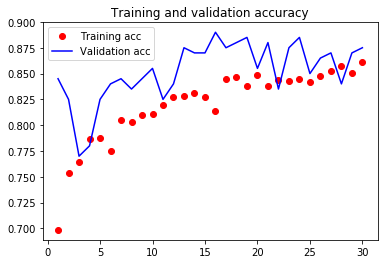

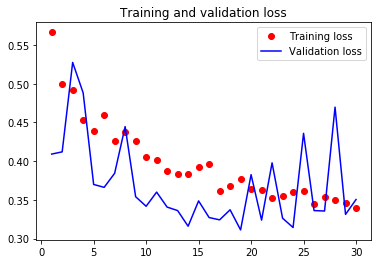

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo',color='red', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')

plt.legend()

plt.figure()


plt.plot(epochs, loss, 'bo',color='red', label='Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [14]:
test_images, test_labels = next(test_batches)

In [16]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

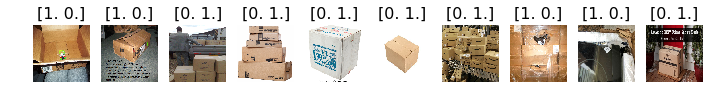

In [19]:
imgs, labels = next(train_batches)
plots(imgs,titles=labels)

In [20]:
test_labels = test_labels[:,0]
test_labels

array([1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.], dtype=float32)

In [4]:
predict = model.predict_generator(test_batches,steps=1,verbose=0)

In [22]:
predict

array([[1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.000000

In [ ]:
n = 0

for i in predict:
    if (predict[n] > 0.5):
        predict[n] = 1
    else:
        predict[n] = 0
    n += 1

In [23]:
cm = confusion_matrix(test_labels,np.ceil(predict))

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    #This function prints and plots the confusion matrix.
    #Normalization can be applied by setting `normalize=True`.
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[  0 100]
 [  5  95]]


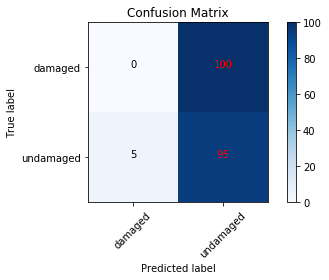

In [25]:
cm_plot_labels = ['damaged', 'undamaged']
plot_confusion_matrix(cm,cm_plot_labels, title='Confusion Matrix')

In [26]:
K.clear_session()